<img src="escuela-de-economia.png" width="260" height="60">
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Profesor:  Randall Romero Aguilar, PhD</b>
<br><br>
<b>Laboratorio:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Tema 3: Modelos ARMA</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estimación de la demanda de dinero</div> 
</center>
<i>Creado:     2020-Abr-20 
    <br>
    Actualizado: 2020-Sep-08</i>

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Este cuaderno está corriendo en Google Colab. Es necesario instalar el paquete bccr para obtener los datos")
    !pip install bccr
else:
    print("Este cuaderno está corriendo localmente.")


Este cuaderno está corriendo localmente.


In [2]:
import bccr
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
plt.style.use('seaborn')

# Cambiar tamaño de las fuentes
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [4]:
consulta = bccr.ServicioWeb()
consulta


CLASE ServicioWeb

Esta clase permite buscar y descargar datos de indicadores del servicio web del Banco Central de Costa Rica.
Suponiendo que el objeto de clase ServicioWeb se llama "consulta":
    * para buscar indicadores, utilice 
        consulta.buscar()
    * para saber más detalles del indicador 8 (por ejemplo)
        consulta.quien(8)
    * para buscar las subcuentas de un indicador, digamos el 784
        consulta.subcuentas(784)      
    * para descargar datos de indicadors 4, 7 y 231 (por ejemplo), hay varias formas de hacerlo 
        consulta(4, 7, 231)   # pasando los códigos directamente
        consulta([4, 7, 231]) # pasando los códigos en una lista
        consulta({'4':'indicA', '7':'indicB', '231':'indicC'} # pasando los códigos en un diccionario, en 
            cuyo caso los indicadores son renombrados como 'indicA', 'indicB' y 'indicC', respectivamente.        

In [5]:
consulta.buscar()

 BUSCAR
            Esta función ayuda a buscar los códigos de indicadores, utilizando palabras descriptivas.
            Exactamente un parámetro de [frase, todos, algunos] debe ser proporcionado.
            
            Ejemplos de uso:
                buscar(frase="descripción contiene esta frase literalmente")
                buscar(todos="descripción contiene todos estos términos en cualquir orden")
                buscar(algunos="descripción contiene alguno de estos términos")
                buscar()  # muestra este mensaje de ayuda
            


In [6]:
consulta.buscar(todos='medio circulante')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1445,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema bancario nacional [1445]'),Medio circulante,Colón Costarricense,Millones,Mensual
1479,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]'),Medio circulante,Colón Costarricense,Millones,Mensual
2936,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]/Otros activos netos [2...,Otros activos netos,Colón Costarricense,Millones,Mensual


In [7]:
consulta.buscar(todos='tasa básica pasiva', frecuencia='D')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
423,Node('/BCCR/Tasas de interés/Tasa básica pasiva calculada por el BCCR [423]'),Tasa Básica pasiva bruta calculada por el Banco Central.,Porcentaje,NO DEFINIDO,Diaria


In [8]:
indicadores = {'35449':'IMAE',
               '25482':'IPC',
               '1445':'M1', 
               '423':'Tbasica'}

In [9]:
datos = consulta(indicadores, func=np.mean).dropna()
datos

variable,IMAE,IPC,M1,Tbasica
1991-01,51.107029,8.064069,6.158123e+04,34.000000
1991-02,42.664338,8.301969,6.024168e+04,35.000000
1991-03,40.390182,8.407419,5.942290e+04,33.193548
1991-04,40.184189,8.644489,6.078601e+04,33.000000
1991-05,40.275039,8.794029,6.185368e+04,32.500000
...,...,...,...,...
2020-02,126.436889,106.535301,4.002822e+06,5.434483
2020-03,125.242581,106.503097,4.245505e+06,4.437097
2020-04,108.007939,106.033447,4.614638e+06,3.803333
2020-05,110.830612,105.879502,4.760278e+06,3.859677


In [10]:
res = ols('M1 ~ IMAE + IPC + Tbasica', data=np.log(datos)).fit()

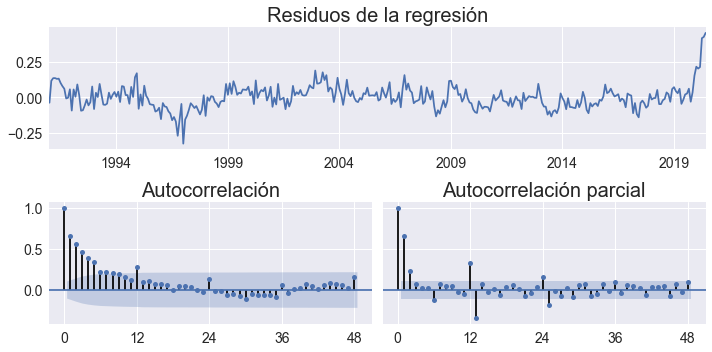

In [11]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(title='Residuos de la regresión', ax=ax)

OPCIONES = dict(lags=48, alpha=0.05, )
sm.graphics.tsa.plot_acf(res.resid, ax=axs0, title='Autocorrelación',**OPCIONES);
sm.graphics.tsa.plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial', **OPCIONES);
axs0.set_xticks([0,12,24,36,48])
axs1.set_xticks([0,12,24,36,48])

fig.savefig('residuos-demanda-dinero.pdf', bbox_inches='tight')

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.480e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:28:40   Log-Likelihood:                 380.37
No. Observations:                 354   AIC:                            -752.7
Df Residuals:                     350   BIC:                            -737.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8627      0.262     22.348      0.000       5.347       6.379
IMAE           1.0827      0.069     15.794      0.000       0.948       1.218
IPC            0.9394      0.024     38.927      0.000       0.892       0.987
Tbasica       -0.2883      0.020    -14.348      0.000      -0.328      -0.249
==============================================================================
Omnibus:                      102.451   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.862
Skew:                           1.075   Prob(JB):                    1.35e-128
Kurtosis:                       8.941   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sss = res.summary()

with open('regresion-M1.tex','w') as file:
    file.write(sss.tables[1].as_latex_tabular())